In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

C:\Users\Hamza\anaconda3\envs\ml_proj\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Processing

In [2]:
MEDford_df_RF = pd.read_csv('MEdford_US_Data_2015-2018_RF.csv') 
MEDford_df_RF

Year  Month  Day  Hour  Minute  GHI  Clearsky GHI  Cloud Type  \
0      2015      1    1     0      30    0             0           0   
1      2015      1    1     1      30    0             0           0   
2      2015      1    1     2      30    0             0           0   
3      2015      1    1     3      30    0             0           0   
4      2015      1    1     4      30    0             0           0   
...     ...    ...  ...   ...     ...  ...           ...         ...   
35012  2018     12   30    20      30    0             0           0   
35013  2018     12   30    21      30    0             0           0   
35014  2018     12   30    22      30    0             0           0   
35015  2018     12   30    23      30    0             0           0   
35016  2018     12   31     0      30    0             0           8   

       Wind Speed  Relative Humidity  Temperature  Pressure  GHI_Day_Ahead  
0             0.4              85.18         -1.0       970              0  
1             0.4              83.54         -1.0       970              0  
2             0.4              82.07         -1.0       970              0  
3             0.4              80.75         -1.0       970              0  
4             0.4              79.63         -2.0       970              0  
...           ...                ...          ...       ...            ...  
35012         0.1              83.23          2.9       969              0  
35013         0.1              83.75          2.7       969              0  
35014         0.1              83.67          2.4       969              0  
35015         0.1              83.41          2.1       970              0  
35016         0.1              83.73          1.9       970              0  

[35017 rows x 13 columns]

In [3]:
MEDford_df_RF = MEDford_df_RF.dropna()
MEDford_df_RF

Year  Month  Day  Hour  Minute  GHI  Clearsky GHI  Cloud Type  \
0      2015      1    1     0      30    0             0           0   
1      2015      1    1     1      30    0             0           0   
2      2015      1    1     2      30    0             0           0   
3      2015      1    1     3      30    0             0           0   
4      2015      1    1     4      30    0             0           0   
...     ...    ...  ...   ...     ...  ...           ...         ...   
35012  2018     12   30    20      30    0             0           0   
35013  2018     12   30    21      30    0             0           0   
35014  2018     12   30    22      30    0             0           0   
35015  2018     12   30    23      30    0             0           0   
35016  2018     12   31     0      30    0             0           8   

       Wind Speed  Relative Humidity  Temperature  Pressure  GHI_Day_Ahead  
0             0.4              85.18         -1.0       970              0  
1             0.4              83.54         -1.0       970              0  
2             0.4              82.07         -1.0       970              0  
3             0.4              80.75         -1.0       970              0  
4             0.4              79.63         -2.0       970              0  
...           ...                ...          ...       ...            ...  
35012         0.1              83.23          2.9       969              0  
35013         0.1              83.75          2.7       969              0  
35014         0.1              83.67          2.4       969              0  
35015         0.1              83.41          2.1       970              0  
35016         0.1              83.73          1.9       970              0  

[35017 rows x 13 columns]

### Correlatino betweeen GHI and other features

In [4]:
Corr = MEDford_df_RF.corr()
Corr['GHI_Day_Ahead']

Year                 0.001864
Month               -0.028440
Day                  0.006583
Hour                 0.118228
Minute                    NaN
GHI                  0.887160
Clearsky GHI         0.894439
Cloud Type          -0.177922
Wind Speed          -0.064608
Relative Humidity   -0.643953
Temperature          0.651780
Pressure            -0.025800
GHI_Day_Ahead        1.000000
Name: GHI_Day_Ahead, dtype: float64

In [5]:
MEDford_df_new = MEDford_df_RF.copy()
MEDford_df_new['DateTime'] = MEDford_df_RF[['Year', 'Month', 'Day', 'Hour']].apply(lambda s : datetime.datetime(*s),axis = 1)
MEDford_df_new = MEDford_df_new.drop(columns = ['Year','Minute'])
MEDford_df_new['DateTime'] = pd.to_datetime(MEDford_df_new['DateTime']) 
MEDford_df_new.set_index(['DateTime'], drop=True, inplace=True)
MEDford_df_new.head(15)

Month  Day  Hour  GHI  Clearsky GHI  Cloud Type  \
DateTime                                                               
2015-01-01 00:00:00      1    1     0    0             0           0   
2015-01-01 01:00:00      1    1     1    0             0           0   
2015-01-01 02:00:00      1    1     2    0             0           0   
2015-01-01 03:00:00      1    1     3    0             0           0   
2015-01-01 04:00:00      1    1     4    0             0           0   
2015-01-01 05:00:00      1    1     5    0             0           0   
2015-01-01 06:00:00      1    1     6    0             0           0   
2015-01-01 07:00:00      1    1     7    0             0           0   
2015-01-01 08:00:00      1    1     8   93            93           0   
2015-01-01 09:00:00      1    1     9  236           236           0   
2015-01-01 10:00:00      1    1    10  351           351           0   
2015-01-01 11:00:00      1    1    11  419           419           0   
2015-01-01 12:00:00      1    1    12  432           432           0   
2015-01-01 13:00:00      1    1    13  389           389           0   
2015-01-01 14:00:00      1    1    14  296           296           0   

                     Wind Speed  Relative Humidity  Temperature  Pressure  \
DateTime                                                                    
2015-01-01 00:00:00         0.4              85.18         -1.0       970   
2015-01-01 01:00:00         0.4              83.54         -1.0       970   
2015-01-01 02:00:00         0.4              82.07         -1.0       970   
2015-01-01 03:00:00         0.4              80.75         -1.0       970   
2015-01-01 04:00:00         0.4              79.63         -2.0       970   
2015-01-01 05:00:00         0.4              78.93         -2.0       970   
2015-01-01 06:00:00         0.4              78.75         -2.0       970   
2015-01-01 07:00:00         0.4              72.82         -1.0       970   
2015-01-01 08:00:00         0.4              66.16          0.0       970   
2015-01-01 09:00:00         0.3              63.72          2.0       970   
2015-01-01 10:00:00         0.3              65.71          5.0       970   
2015-01-01 11:00:00         0.3              70.69          7.0       960   
2015-01-01 12:00:00         0.2              75.98          8.0       960   
2015-01-01 13:00:00         0.2              80.02          8.0       960   
2015-01-01 14:00:00         0.3              95.09          7.0       960   

                     GHI_Day_Ahead  
DateTime                            
2015-01-01 00:00:00              0  
2015-01-01 01:00:00              0  
2015-01-01 02:00:00              0  
2015-01-01 03:00:00              0  
2015-01-01 04:00:00              0  
2015-01-01 05:00:00              0  
2015-01-01 06:00:00              0  
2015-01-01 07:00:00              0  
2015-01-01 08:00:00              0  
2015-01-01 09:00:00             89  
2015-01-01 10:00:00            228  
2015-01-01 11:00:00            340  
2015-01-01 12:00:00            407  
2015-01-01 13:00:00            421  
2015-01-01 14:00:00            379

## Model training and testing 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import timeit

# Features
X = MEDford_df_RF.copy()
X = X.drop(columns = ['GHI_Day_Ahead'])
X.index = MEDford_df_new.index

# GHI
y = MEDford_df_new['GHI_Day_Ahead']

X_train, X_test, Y_train, Y_test = X[:26244],X[26244:], y[:26244], y[26244:]

# Create Randfom forest model
RF_model = RandomForestRegressor(max_depth=50, n_estimators=100, oob_score=True, random_state = 0)

start  = timeit.default_timer()
# fit model 
RF_model.fit(X_train,Y_train)
stop = timeit.default_timer()
print('Time: ', stop - start)

# Make Prediction 
y_pred = RF_model.predict(X_test)

Time:  6.5841989


#### Comparision between Actual and Train predictions - Random Forest

In [7]:
train_predictions = RF_model.predict(X_train).flatten()
train_results = pd.DataFrame(data = {'Train prediction':train_predictions,'Actual':Y_train }, index = MEDford_df_new.index[:26244])
train_results

Train prediction  Actual
DateTime                                     
2015-01-01 00:00:00              0.00       0
2015-01-01 01:00:00              0.00       0
2015-01-01 02:00:00              0.00       0
2015-01-01 03:00:00              0.00       0
2015-01-01 04:00:00              0.00       0
...                               ...     ...
2017-12-30 07:00:00              0.00       0
2017-12-30 08:00:00              0.00       0
2017-12-30 09:00:00             61.75      60
2017-12-30 10:00:00            160.01     157
2017-12-30 11:00:00            213.23     236

[26244 rows x 2 columns]

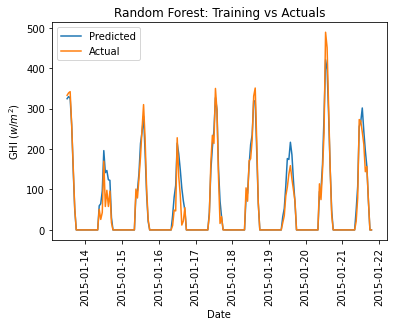

In [8]:
plt.plot(train_results['Train prediction'][300:500], label = 'Predicted')
plt.plot(train_results['Actual'][300:500], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Random Forest: Training vs Actuals')
_=plt.xticks(rotation = 90)
plt.legend()

#### Comparision between Actual and Test predictions - Random Forest

In [9]:
Y_test.index = y[len(Y_train):].index
RF_results= pd.DataFrame(data = {'Test prediction':y_pred,'Actual':Y_test }, index =y[len(Y_train):].index)
RF_results

Test prediction  Actual
DateTime                                    
2017-12-30 12:00:00           202.22     311
2017-12-30 13:00:00           221.54     358
2017-12-30 14:00:00           217.81     247
2017-12-30 15:00:00           192.53     186
2017-12-30 16:00:00            99.54     151
...                              ...     ...
2018-12-30 20:00:00             1.31       0
2018-12-30 21:00:00             0.00       0
2018-12-30 22:00:00             0.00       0
2018-12-30 23:00:00             0.00       0
2018-12-31 00:00:00             0.00       0

[8773 rows x 2 columns]

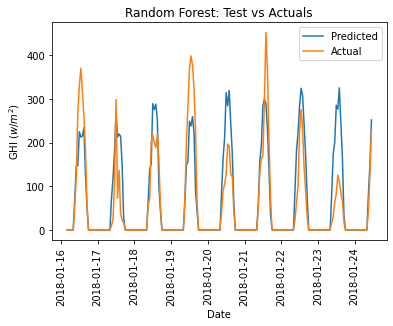

In [10]:
plt.plot(RF_results['Test prediction'][400:600], label = 'Predicted')
plt.plot(RF_results['Actual'][400:600], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Random Forest: Test vs Actuals')
_=plt.xticks(rotation = 90)
plt.legend()

#### Training and Testing scores of Random Forest 

In [11]:
from sklearn.metrics import r2_score
print('Training score:', r2_score(Y_train, train_results['Train prediction'] ))
print('Testing score:', r2_score(RF_results['Actual'], RF_results['Test prediction']))
RF_results.corr()['Test prediction']

Training score: 0.9874979513427712
Testing score: 0.9023274216427819


Test prediction    1.000000
Actual             0.949909
Name: Test prediction, dtype: float64

## Scenario 2


##### Winter: 12 ,1 ,2 
##### Spring: 3,4,5
##### Summer: 6,7,8
##### Fall : 9,10,11

In [12]:
Fall_RF = RF_results['2018-9-1 01:00:00': '2018-11-30 23:00:00']
Spring_RF =RF_results['2018-3-1 01:00:00': '2018-5-31 23:00:00']
Summer_RF = RF_results['2018-6-1 01:00:00': '2018-8-31 23:00:00']
W = RF_results['2018-1-1 01:00:00': '2018-2-28 23:00:00']
W.values.tolist()
Winter_RF = W.append(RF_results['2018-12-1 01:00:00': '2018-12-31 23:00:00'])
Winter_RF

C:\Users\Hamza\AppData\Local\Temp\ipykernel_18672\3018367105.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Winter_RF = W.append(RF_results['2018-12-1 01:00:00': '2018-12-31 23:00:00'])


Test prediction  Actual
DateTime                                    
2018-01-01 01:00:00             0.00       0
2018-01-01 02:00:00             0.00       0
2018-01-01 03:00:00             0.00       0
2018-01-01 04:00:00             0.00       0
2018-01-01 05:00:00             0.00       0
...                              ...     ...
2018-12-30 20:00:00             1.31       0
2018-12-30 21:00:00             0.00       0
2018-12-30 22:00:00             0.00       0
2018-12-30 23:00:00             0.00       0
2018-12-31 00:00:00             0.00       0

[2135 rows x 2 columns]

#### Winter

Random forest Winter Testing score: 0.7603712150276063


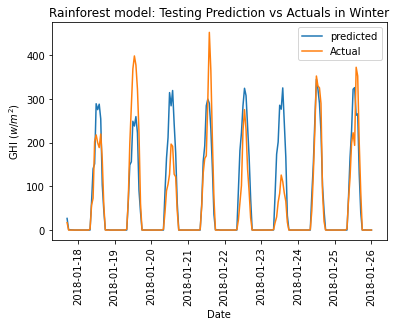

In [13]:
plt.plot(Winter_RF['Test prediction'][400:600],label = 'predicted')
plt.plot(Winter_RF['Actual'][400:600], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Rainforest model: Testing Prediction vs Actuals in Winter')
_=plt.xticks(rotation = 90)
plt.legend()
print('Random forest Winter Testing score:', r2_score(Winter_RF['Actual'], Winter_RF['Test prediction']))

#### Summer

In [14]:
plt.plot(Summer_RF['Test prediction'][100:300],label = 'predicted')
plt.plot(Summer_RF['Actual'][100:300], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Rainforest model: Testing Prediction vs Actuals in Summer')
_=plt.xticks(rotation = 90)
plt.legend()
print('Random forest Summer Testing score:', r2_score(Summer_RF['Actual'], Summer_RF['Test prediction']))

Random forest Summer Testing score: 0.965293618748437


#### Spring

In [15]:
plt.plot(Spring_RF['Test prediction'][100:300],label = 'predicted')
plt.plot(Spring_RF['Actual'][100:300], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Rainforest model: Testing Prediction vs Actuals in Spring')
_=plt.xticks(rotation = 90)
plt.legend()
print('Random forest Spring Testing score:', r2_score(Spring_RF['Actual'], Spring_RF['Test prediction']))

Random forest Spring Testing score: 0.8078998567583664


#### Fall

Random forest Fall Testing score: 0.8993932243875982


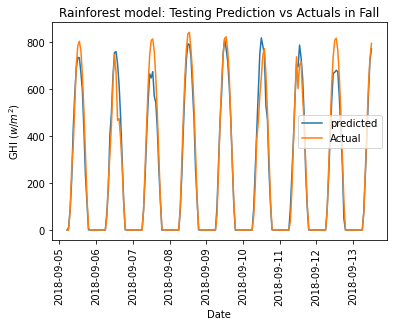

In [16]:
plt.plot(Fall_RF['Test prediction'][100:300],label = 'predicted')
plt.plot(Fall_RF['Actual'][100:300], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Rainforest model: Testing Prediction vs Actuals in Fall')
_=plt.xticks(rotation = 90)
plt.legend()
print('Random forest Fall Testing score:', r2_score(Fall_RF['Actual'], Fall_RF['Test prediction']))

## Compare all the three methods for Senario 2

In [17]:
### LSTM
%store -r Fall_LSTM
%store -r Spring_LSTM
%store -r Summer_LSTM
%store -r Winter_LSTM

In [18]:
### GRU
%store -r Fall_GRU
%store -r Spring_GRU
%store -r Summer_GRU
%store -r Winter_GRU

### Winter

Random forest Winter Testing score: 0.7603712150276063
GRU Winter Testing score: 0.7208493052722644
LSTM Winter Testing score: 0.7523940425660978


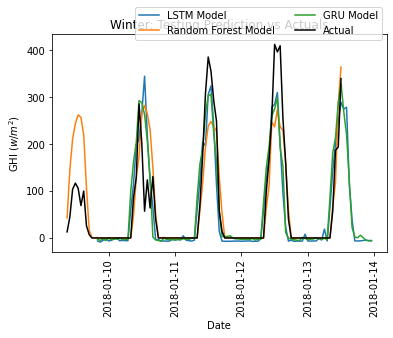

In [19]:
plt.plot(Winter_LSTM['Test prediction'][200:300],label = 'LSTM Model')
plt.plot(Winter_RF['Test prediction'][200:300],label = 'Random Forest Model')
plt.plot(Winter_GRU['Test prediction'][200:300],label = 'GRU Model')
plt.plot(Winter_RF['Actual'][200:300], label = 'Actual',color='black')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Winter: Testing Prediction vs Actuals')
_=plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor =(1, 1.15), ncol = 2)
print('Random forest Winter Testing score:', r2_score(Winter_RF['Actual'], Winter_RF['Test prediction']))
print('GRU Winter Testing score:', r2_score(Winter_GRU['Actual'], Winter_GRU['Test prediction']))
print('LSTM Winter Testing score:', r2_score(Winter_LSTM['Actual'], Winter_LSTM['Test prediction']))

### Spring

In [20]:
plt.plot(Spring_LSTM['Test prediction'][200:300],label = 'LSTM Model')
plt.plot(Spring_RF['Test prediction'][200:300],label = 'Random Forest Model')
plt.plot(Spring_GRU['Test prediction'][200:300],label = 'GRU Model')
plt.plot(Spring_RF['Actual'][200:300], label = 'Actual',color='black')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Spring: Testing Prediction vs Actuals')
_=plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor =(1, 1.15), ncol = 2)
print('Random forest Fall Testing score:', r2_score(Spring_RF['Actual'], Spring_RF['Test prediction']))
print('GRU Spring Testing score:', r2_score(Spring_GRU['Actual'], Spring_GRU['Test prediction']))
print('LSTM Spring Testing score:', r2_score(Spring_LSTM['Actual'], Spring_LSTM['Test prediction']))

Random forest Fall Testing score: 0.8078998567583664
GRU Spring Testing score: 0.8120480225176638
LSTM Spring Testing score: 0.804720695194234


### Fall

In [21]:
plt.plot(Fall_LSTM['Test prediction'][200:300],label = 'LSTM Model')
plt.plot(Fall_RF['Test prediction'][200:300],label = 'Random Forest Model')
plt.plot(Fall_GRU['Test prediction'][200:300],label = 'GRU Model')
plt.plot(Fall_RF['Actual'][200:300], label = 'Actual',color='black')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Fall: Testing Prediction vs Actuals')
_=plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor =(1, 1.15), ncol = 2)
print('Random forest Fall Testing score:', r2_score(Fall_RF['Actual'], Fall_RF['Test prediction']))
print('GRU Fall Testing score:', r2_score(Fall_GRU['Actual'], Fall_GRU['Test prediction']))
print('LSTM Fall Testing score:', r2_score(Fall_LSTM['Actual'], Fall_LSTM['Test prediction']))

Random forest Fall Testing score: 0.8993932243875982
GRU Fall Testing score: 0.8973769125964152
LSTM Fall Testing score: 0.9098048443106749


### Summer

Random forest Summer Testing score: 0.965293618748437
GRU Summer Testing score: 0.9538637943915981
LSTM Summer Testing score: 0.9626609058331874


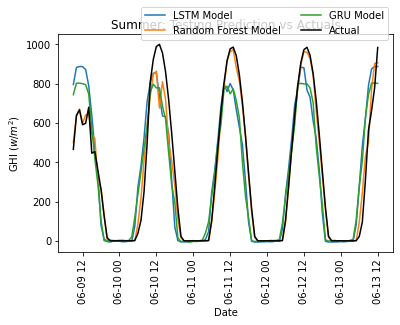

In [22]:
plt.plot(Summer_LSTM['Test prediction'][200:300],label = 'LSTM Model')
plt.plot(Summer_RF['Test prediction'][200:300],label = 'Random Forest Model')
plt.plot(Summer_GRU['Test prediction'][200:300],label = 'GRU Model')
plt.plot(Summer_RF['Actual'][200:300], label = 'Actual',color='black')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Summer: Testing Prediction vs Actuals')
_=plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor =(1, 1.15), ncol = 2)
print('Random forest Summer Testing score:', r2_score(Summer_RF['Actual'], Summer_RF['Test prediction']))
print('GRU Summer Testing score:', r2_score(Summer_GRU['Actual'], Summer_GRU['Test prediction']))
print('LSTM Summer Testing score:', r2_score(Summer_LSTM['Actual'], Summer_LSTM['Test prediction']))